In [5]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [7]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.


In [2]:
subject_name = 'Linda'

import listen_italian_functions
from matplotlib import pyplot as plt
import mne
import os
import numpy as np
import scipy.io
import warnings
warnings.filterwarnings('ignore')

data_path = os.path.dirname(os.path.dirname(os.getcwd()))
raw_fname = data_path + '/analysis/python/data/'+subject_name+'_raw.fif'
raw = mne.io.read_raw_fif(raw_fname,preload=True)

raw_fname = data_path + '/analysis/behaviour/data/subject/'+subject_name+'_behaviour.mat'
mat = scipy.io.loadmat(raw_fname)

Opening raw data file D:\projects\current\listen_italian_motor_entrainment\analysis\python\preprocessing_subjects\Linda_raw.fif...
    Range : 25796 ... 1117847 =     25.796 ...  1117.847 secs
Ready.
Reading 0 ... 1092051  =      0.000 ...  1092.051 secs...


In [3]:
# extract trials of tmax second and remove the wrong answer trials and seperate them in three conditions
Tmin = -0.5
Tmax = 2

epochs = listen_italian_functions.epoch(raw, mat,Tmin, Tmax)


800 events found
Event IDs: [100 105 106 200]
200 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
183 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activ

In [4]:
print(epochs.tmin)
print(epochs.tmax)


-0.5
1.9975


In [5]:
import pandas as pd
# let's explore some frequency bands
iter_freqs = [
    ('Delta', 1, 3),
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 40)
]

frames = []

condition = ['Hyper','Normal','Hypo']
for band, fmin, fmax in iter_freqs:
    feature = 'envelop'
    hyper, normal, hypo = listen_italian_functions.coherence_freq(epochs,fmin, fmax,feature)
    X = (hyper.flatten(),normal.flatten(),hypo.flatten())
    a = band+ ' '+str(fmin)+' - '+str(fmax)+'Hz'
    df = pd.DataFrame({a:X},index=condition)
    frames.append(df)
    
data=pd.concat((frames),axis=1)
data.index.names = ['Condition']


Connectivity computation...
    computing connectivity for 59 connections
    using t=0.000s..1.998s for estimation (800 points)
fmin=1.000 Hz corresponds to 2.000 < 5 cycles based on the epoch length 2.000 sec, need at least 5.000 sec epochs or fmin=2.500. Spectrum estimate will be unreliable.
    frequencies: 1.0Hz..3.0Hz (5 points)
    connectivity scores will be averaged for each band
    using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connecti

    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36
    computing connectivity for epoch 37
    computing connectivity for epoch 38
    computing connectivity for epoch 39
    computing connectivity for epoch 40
    computing connectivity for epoch 41
    computing connectivity for epoch 42
    computing connectivity for epoch 43
    computing connectivity for epoch 44
    computing connectivity for epoch 45
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 59 connections
    using t=0.000s..1.998s for estimation (800 points)
    frequencies: 4.0Hz..7.0Hz (7 points)
    connectivity scores will be averaged for each band
    using multitaper spectrum estimation with 7 DPSS windows
  

    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36
    computing connectivity for epoch 37
    computing connectivity for epoch 38
    computing connectivity for epoch 39
    computing connectivity for epoch 40
    computing connectivity for epoch 41
    computing connectivity for epoch 42
    computing connectivity for epoch 43
    computing connectivity for epoch 44
    computing connectivity for epoch 45
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 59 connections
    using t=0.

    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36
    computing connectivity for epoch 37
    computing connectivity for epoch 38
    computing connectivity for epoch 39
    computing connectivity for epoch 40
    computing connectivity for epoch 41
    computing connectivity for epoch 42
    computing connectivity for epoch 43


    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36
    computing connectivity for epoch 37
    computing connectivity for epoch 38


    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
 

In [6]:
data

,Delta 1 - 3Hz,Theta 4 - 7Hz,Alpha 8 - 12Hz,Beta 13 - 25Hz,Gamma 30 - 40Hz
Condition,,,,,
Hyper,"[0.11569515083443464, 0.11944918332623959, 0.1...","[0.05578322044008573, 0.047284026922267776, 0....","[0.04060789489277202, 0.04879247682243811, 0.0...","[0.04438566557056571, 0.04277660447075572, 0.0...","[0.048903354670834606, 0.07078317339291289, 0...."
Normal,"[0.06973961997720143, 0.07248486850795531, 0.0...","[0.03531452128598648, 0.040286045143749956, 0....","[0.018433012809845647, 0.014869313381156027, 0...","[0.03432610918713639, 0.03491578081388928, 0.0...","[0.031298595708475895, 0.023551190837621545, 0..."
Hypo,"[0.08271083040446323, 0.08414946878440896, 0.0...","[0.05008444826238465, 0.057097421008963346, 0....","[0.033724748293051623, 0.028915221782941553, 0...","[0.04510005842393444, 0.04489858882931449, 0.0...","[0.031382326456144194, 0.027148810750583435, 0..."


In [7]:
def plot_coherence(data,vmax,vmin,axes,name,a): 
    mne.viz.plot_topomap(data, a.info, axes=axes, show=False,vmin=vmin,vmax=vmax)
    axes.set(title=name)

In [14]:
x  = data.loc['Hyper':'Hypo','Delta 1 - 3Hz']
x

Condition
Hyper     [0.11569515083443464, 0.11944918332623959, 0.1...
Normal    [0.06973961997720143, 0.07248486850795531, 0.0...
Hypo      [0.08271083040446323, 0.08414946878440896, 0.0...
Name: Delta 1 - 3Hz, dtype: object

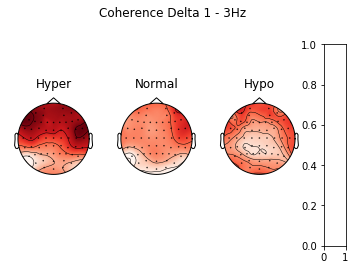

In [9]:

# 'Delta 1 - 3Hz'
a=raw.pick_types(eeg=True, stim=False,misc=False)

vmax=np.amax(np.concatenate(x.as_matrix(), axis=0))
vmin=np.amin(np.concatenate(x.as_matrix(), axis=0))

fig, axes = plt.subplots(1, 3)
plot_coherence(x['Hyper'],vmax,vmin,axes[0],'Hyper',a)
plot_coherence(x['Normal'],vmax,vmin,axes[1],'Normal',a)
plot_coherence(x['Hypo'],vmax,vmin,axes[2],'Hypo',a)

fig.suptitle('Coherence Delta 1 - 3Hz')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(axes,cax=cbar_ax)
fig.show()